Main goals:

1. What is the relationship between class size and test score
2. Is there any causal effect of class size on test score
3. Which model better fits the data and provide more accurate estimation of average scores near the cutoff
4. Compare the results (direction, magnitude, and confidence level) between flexible models and 2SLS, which is the method in the papper



# packages

In [ ]:
!pip install ISLP

In [ ]:
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from ISLP import load_data
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm
import sklearn.linear_model as skl
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.linear_model as skl
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS
from sklearn.tree import DecisionTreeRegressor as DTR

# import data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving final5.dta to final5.dta


In [ ]:
import pandas as pd
import numpy as np
final4 = pd.io.stata.read_stata('final4.dta')
final4.to_csv('final4.dta')

In [ ]:
final5 = pd.io.stata.read_stata('final5.dta')
final5.to_csv('final5.dta')

# OLS

In [ ]:
import statsmodels.api as sm

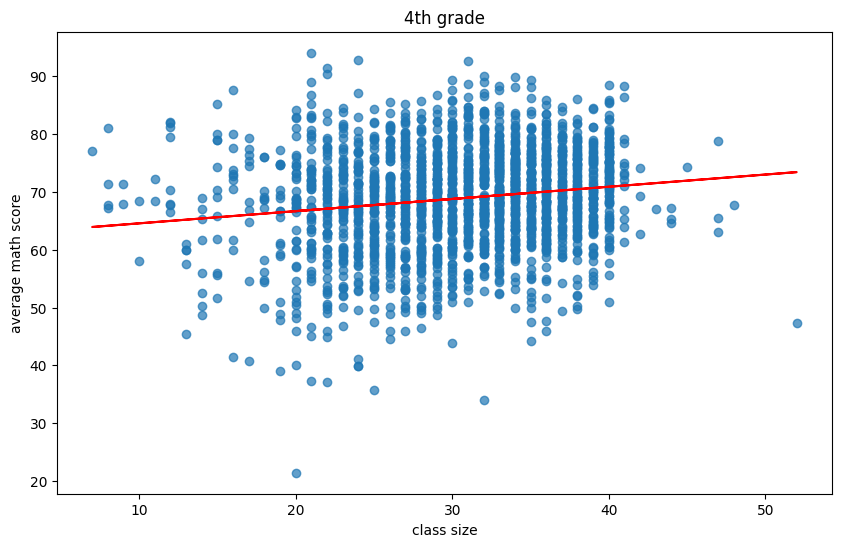

In [ ]:
plt.figure(figsize=(10, 6))
ols4=final4[['classize','avgmath']].dropna()
X_1=ols4['classize']
Y_1=ols4['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse


plt.scatter(X_1, Y_1, cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, color='red')

plt.title('4th grade')
plt.xlabel('class size')
plt.ylabel('average math score')

plt.show()

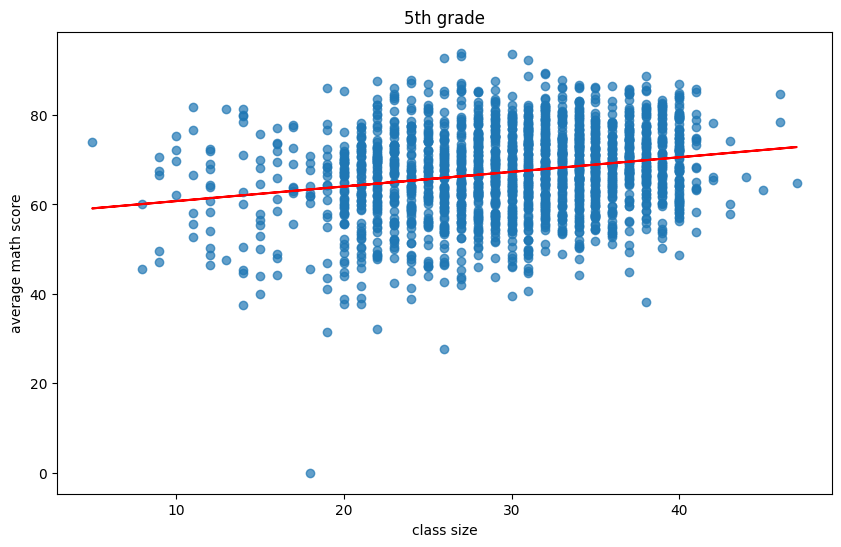

In [ ]:
plt.figure(figsize=(10, 6))
final5=final5[final5['avgmath']<=100]
ols4=final5[['classize','avgmath']].dropna()
X_1=ols4['classize']
Y_1=ols4['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse


plt.scatter(X_1, Y_1, cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, color='red')

plt.title('5th grade')
plt.xlabel('class size')
plt.ylabel('average math score')

plt.show()

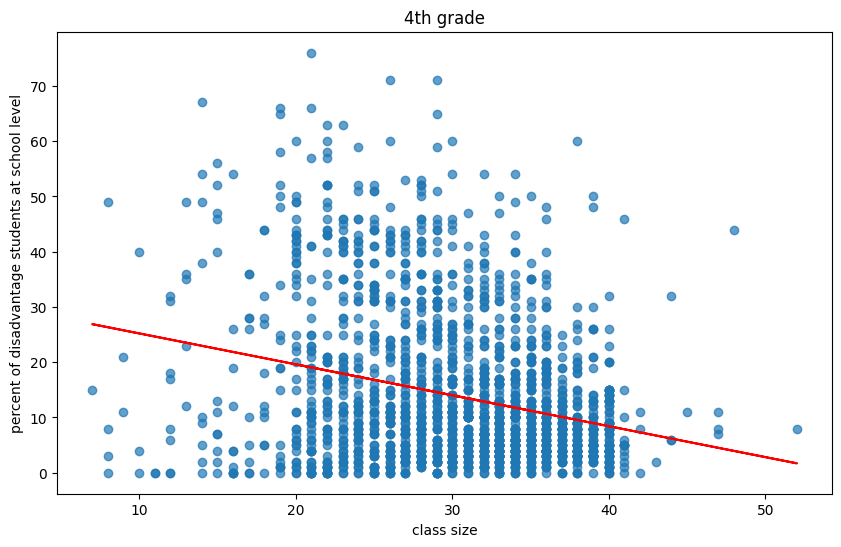

In [ ]:
plt.figure(figsize=(10, 6))
ols4=final4[['classize','tipuach']].dropna()
X_1=ols4['classize']
Y_1=ols4['tipuach']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse


plt.scatter(X_1, Y_1, cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, color='red')

plt.title('4th grade')
plt.xlabel('class size')
plt.ylabel('percent of disadvantage students at school level')

plt.show()

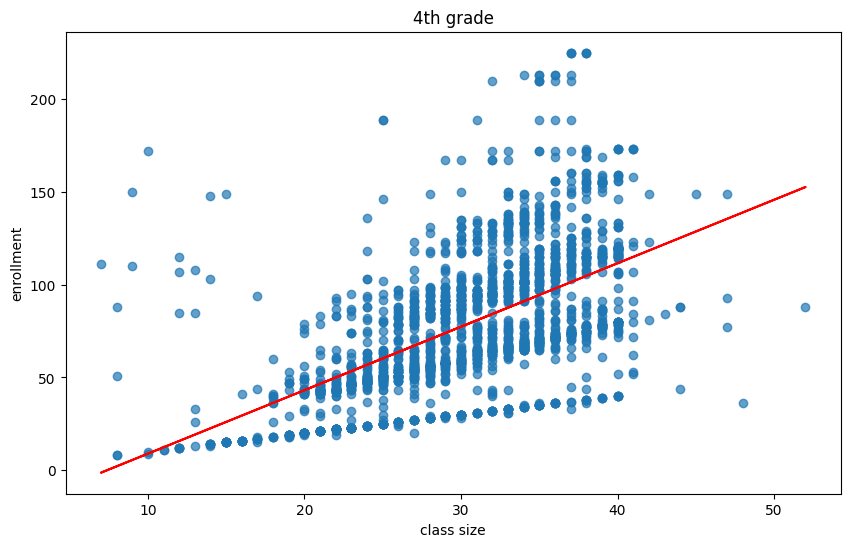

In [ ]:
plt.figure(figsize=(10, 6))
ols4=final4[['classize','c_size']].dropna()
X_1=ols4['classize']
Y_1=ols4['c_size']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse


plt.scatter(X_1, Y_1, cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, color='red')

plt.title('4th grade')
plt.xlabel('class size')
plt.ylabel('enrollment')

plt.show()

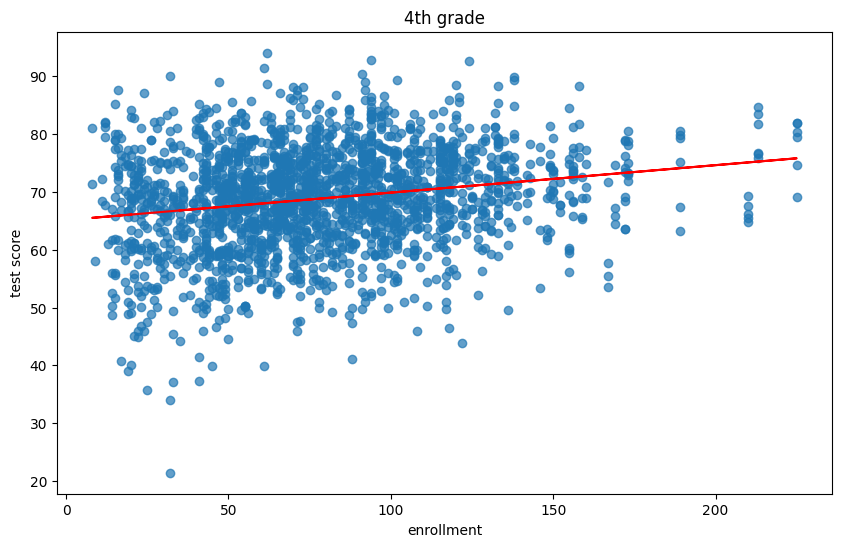

In [ ]:
plt.figure(figsize=(10, 6))
ols4=final4[['c_size','avgmath']].dropna()
X_1=ols4['c_size']
Y_1=ols4['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse


plt.scatter(X_1, Y_1, cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, color='red')

plt.title('4th grade')
plt.xlabel('enrollment')
plt.ylabel('test score')

plt.show()

Positive correlation in general, which counter-intuitive

In [ ]:
final4['const'] = 1
ols4=final4[['const','classize','avgmath']].dropna()
# Specify dependent variable (Y) and independent variables (X1, X2, const)
y = ols4['avgmath']
X = ols4[['const','classize']].astype(float)
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     49.67
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.48e-12
Time:                        00:19:54   Log-Likelihood:                -7353.5
No. Observations:                2055   AIC:                         1.471e+04
Df Residuals:                    2053   BIC:                         1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4545      0.928     67.285      0.000      60.634      64.275
classize       0.2111      0.030      7.048      0.000       0.152       0.270
==============================================================================
Omnibus:                       58.973   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.371
Skew:                          -0.363   Prob(JB):                     8.64e-16
Kurtosis:                       3.533   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
final4['const'] = 1
ols4=final4[['const','classize','avgmath','tipuach']].dropna()
# Specify dependent variable (Y) and independent variables (X1, X2, const)
y = ols4['avgmath']
X = ols4[['const','classize','tipuach']].astype(float)
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     260.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.55e-101
Time:                        00:19:54   Log-Likelihood:                -7145.6
No. Observations:                2055   AIC:                         1.430e+04
Df Residuals:                    2052   BIC:                         1.431e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3453      0.936     76.233      0.000      69.510      73.181
classize       0.0495      0.028      1.762      0.078      -0.006       0.105
tipuach       -0.2885      0.013    -21.452      0.000      -0.315      -0.262
==============================================================================
Omnibus:                       47.226   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.890
Skew:                          -0.270   Prob(JB):                     2.21e-14
Kurtosis:                       3.666   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
final4['const'] = 1
ols4=final4[['const','classize','avgmath','tipuach','c_size']].dropna()
# Specify dependent variable (Y) and independent variables (X1, X2, const)
y = ols4['avgmath']
X = ols4[['const','classize','tipuach','c_size']].astype(float)
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.04e-101
Time:                        00:19:54   Log-Likelihood:                -7142.3
No. Observations:                2055   AIC:                         1.429e+04
Df Residuals:                    2051   BIC:                         1.432e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4805      0.936     76.362      0.000      69.645      73.316
classize       0.0033      0.033      0.099      0.921      -0.062       0.069
tipuach       -0.2808      0.014    -20.407      0.000      -0.308      -0.254
c_size         0.0148      0.006      2.575      0.010       0.004       0.026
==============================================================================
Omnibus:                       46.609   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.498
Skew:                          -0.270   Prob(JB):                     4.43e-14
Kurtosis:                       3.653   Cond. No.                         501.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS generally shows positive correlation between class size and test score; larger class has better performance on test. After we add controls, the positive correlation is reduced, but still positive, which does not correspond with our intuition.
\
\
Two reasons:

1. percent disadvantage variable only track the number of disadvantaged students at the school level, not at the class level within schools, so PD does not explain all the nonrandom selection of students in difference size of class.

2. Background info: school principals may group children who are having trouble with their schoolwork into smaller classes, but since we do not have data on the number of disadvantaged students at the class levle, we are unable to control for this covariate.

# RDD

Maimonides rule

In [ ]:
enrol_class4=final4.groupby('c_size').agg({'classize':'mean'}).reset_index()
enrol_class5=final5.groupby('c_size').agg({'classize':'mean'}).reset_index()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

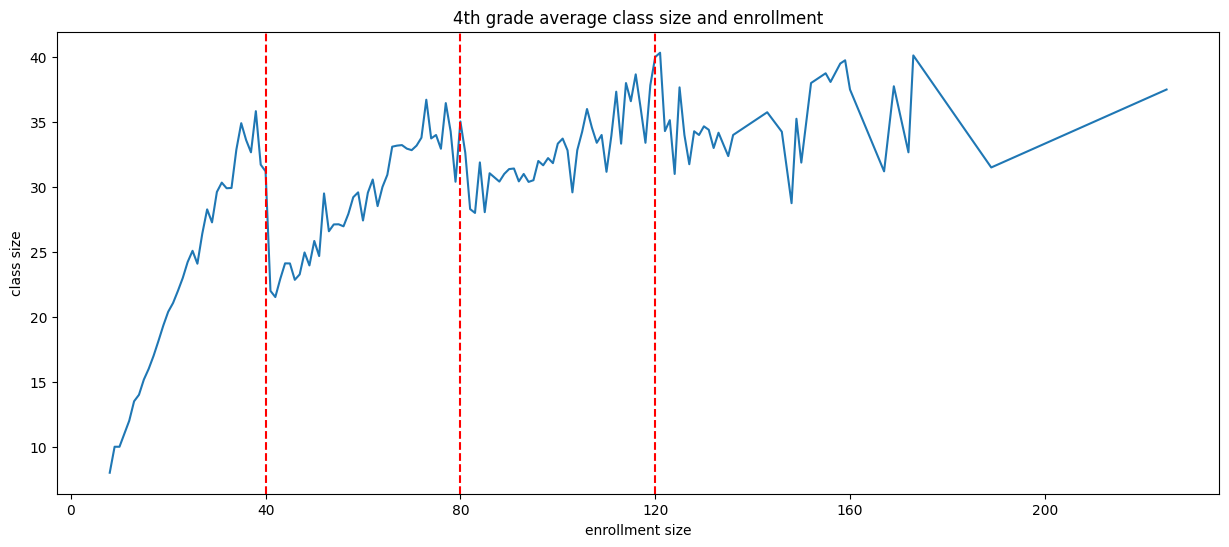

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(enrol_class4['c_size'], enrol_class4['classize'])
plt.axvline(40, color='red', linestyle='--', label=f'40')
plt.axvline(80, color='red', linestyle='--', label=f'80')
plt.axvline(120, color='red', linestyle='--', label=f'120')
plt.xticks(np.arange(min(enrol_class4['c_size'])-8, max(enrol_class4['c_size']) + 1, 40))
plt.title('4th grade average class size and enrollment')
plt.xlabel('enrollment size')
plt.ylabel('class size')
plt.show()

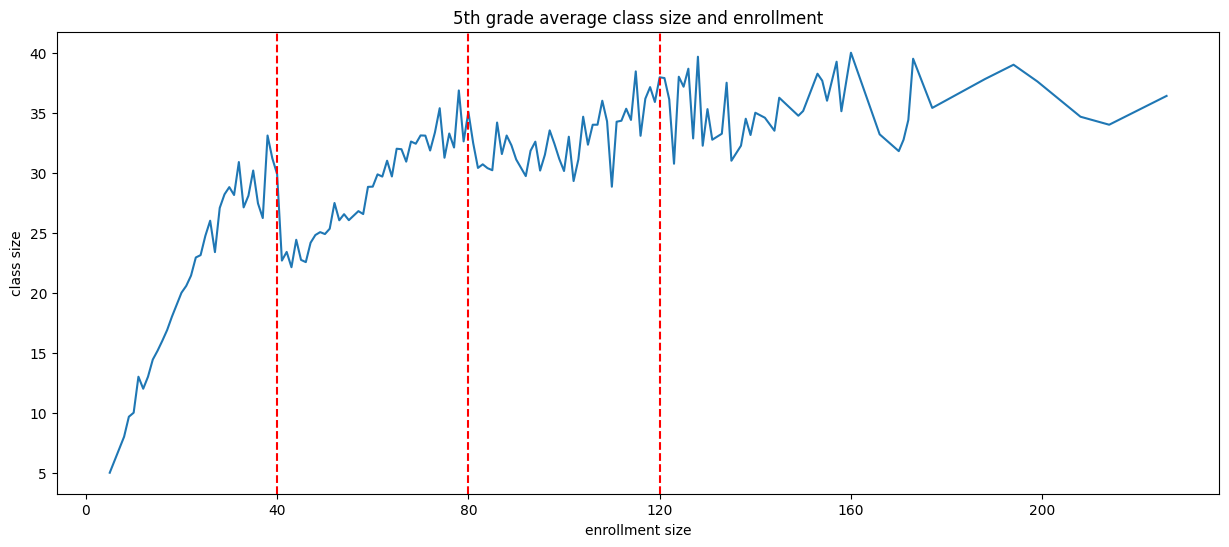

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(enrol_class5['c_size'], enrol_class5['classize'])
plt.axvline(40, color='red', linestyle='--', label=f'40')
plt.axvline(80, color='red', linestyle='--', label=f'80')
plt.axvline(120, color='red', linestyle='--', label=f'120')
plt.xticks(np.arange(min(enrol_class5['c_size'])-5, max(enrol_class5['c_size']) + 1, 40))
plt.title('5th grade average class size and enrollment')
plt.xlabel('enrollment size')
plt.ylabel('class size')
plt.show()
plt.show()

There is a sharp drop at exactly 40 in both 4th and 5th grade and clear upward-sloping trend before enrollment size reaches 40. This means that schools generally have only one class before the class size reaches the limit (40) of Maimonides rule. As long as one more student enrolls, the school has to break the class into two smaller, mostly likely with equal number of students; for example, when enrollment size increases to 41, there will be one class of 20 and one of 21. As enrollment size increases to 80, most schools will split the cohort into 3 class of 25-27 instead of 4 classes of 20. In other words, reduction on class size due to Maimonides rule decreases as enrollment size icnreases. Therefore, when enrollment size exceeds 120 in the graph, there is no significant patterns that reflect Maimonides rule. The class size usually stabilizes around 30-35 even though Maimonides rule is still in effect.

Discontinuity

In [ ]:
data1=final4[(final4['c_size']>=0) & (final4['c_size']<=80)]
data1=data1[['c_size','avgmath']].dropna()
cutoff=40
below=data1[(data1['c_size']<=cutoff)]
above=data1[(data1['c_size']>cutoff)]
above2=data1[(data1['c_size']>=cutoff)]
X_1=below['c_size']
X_2=above['c_size']
Y_1=below['avgmath']
Y_2=above['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
model_2 = sm.OLS(Y_2, sm.add_constant(X_2)).fit()

below_score=np.mean(model_1.predict(sm.add_constant(pd.DataFrame({'c_size':[35,36,37,38,39,40]}))))
above_score=np.mean(model_2.predict(sm.add_constant(pd.DataFrame({'c_size':[40,41,42,43,44,45]}))))
above_score-below_score

2.134413484285247

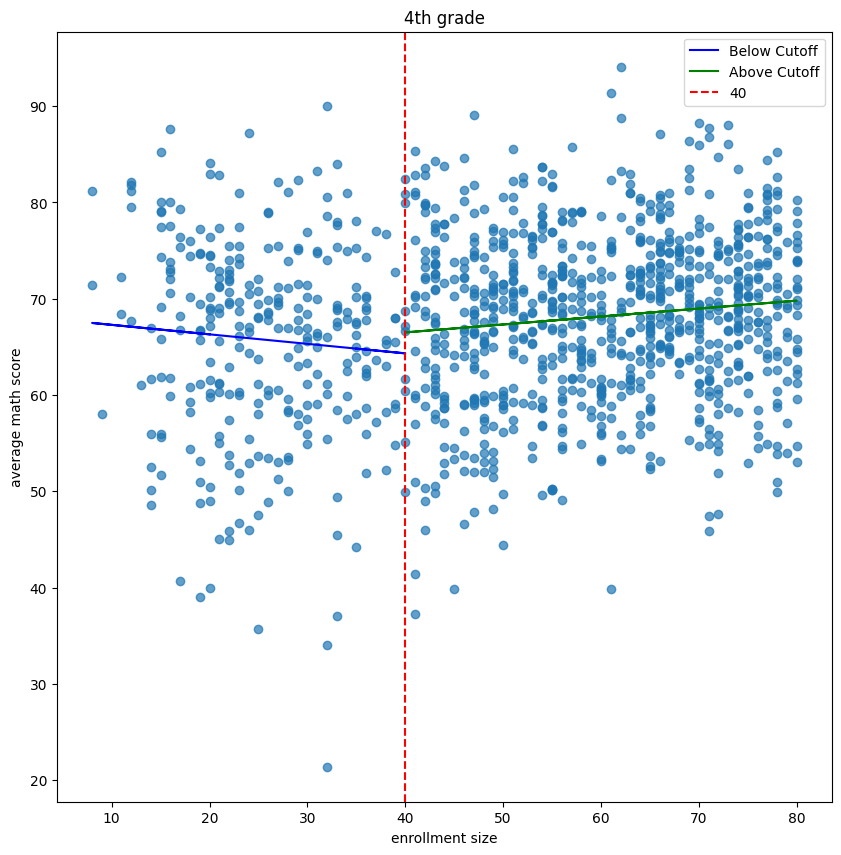

In [ ]:
plt.figure(figsize=(10, 10))
data1=final4[(final4['c_size']>=0) & (final4['c_size']<=80)]
data1=data1[['c_size','avgmath']].dropna()
cutoff=40
below=data1[(data1['c_size']<=cutoff)]
above=data1[(data1['c_size']>cutoff)]
above2=data1[(data1['c_size']>=cutoff)]
X_1=below['c_size']
X_2=above['c_size']
Y_1=below['avgmath']
Y_2=above['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
model_2 = sm.OLS(Y_2, sm.add_constant(X_2)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse
b2, a2 = model_2.params
se_b2, se_a2 = model_2.bse

plt.scatter(data1['c_size'], data1['avgmath'], cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, label='Below Cutoff', color='blue')
plt.plot(above2['c_size'], a2 * above2['c_size'] + b2, label='Above Cutoff', color='green')

plt.axvline(40, color='red', linestyle='--', label=f'{cutoff}')
plt.title('4th grade')
plt.xlabel('enrollment size')
plt.ylabel('average math score')
plt.legend()

plt.show()

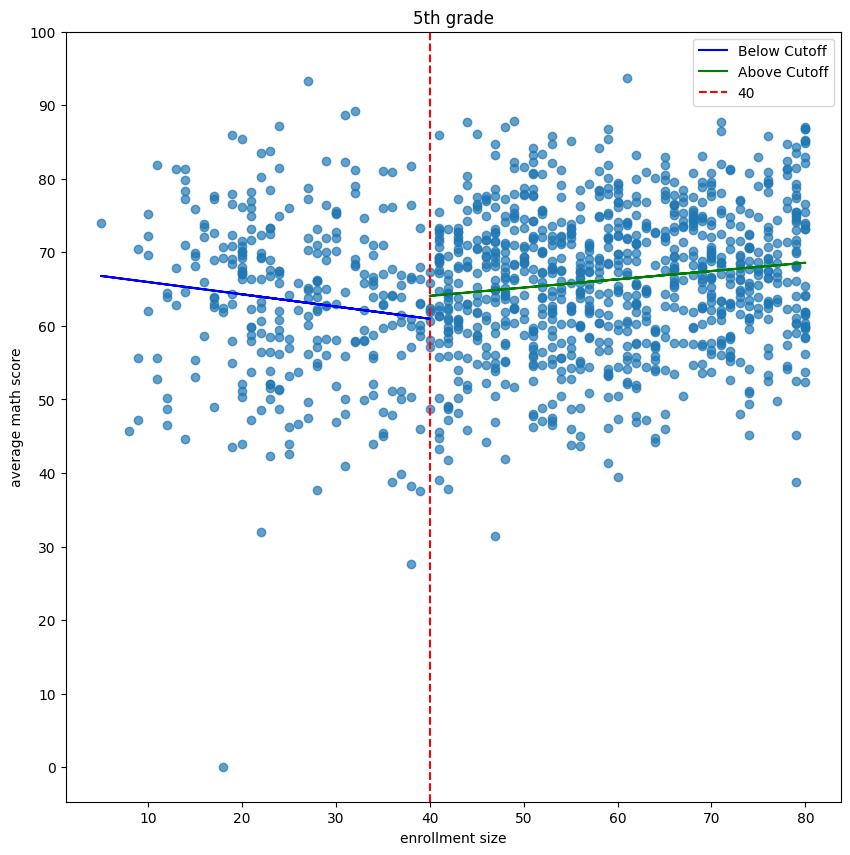

In [ ]:
plt.figure(figsize=(10, 10))
data1=final5[(final5['c_size']>=0) & (final5['c_size']<=80)]
data1=data1[['c_size','avgmath']].dropna()
cutoff=40
below=data1[(data1['c_size']<=cutoff)]
above=data1[(data1['c_size']>=cutoff)]
above2=data1[(data1['c_size']>=cutoff)]
X_1=below['c_size']
X_2=above['c_size']
Y_1=below['avgmath']
Y_2=above['avgmath']

model_1 = sm.OLS(Y_1, sm.add_constant(X_1)).fit()
model_2 = sm.OLS(Y_2, sm.add_constant(X_2)).fit()
b1, a1 = model_1.params
se_b1,se_a1 = model_1.bse
b2, a2 = model_2.params
se_b2, se_a2 = model_2.bse

plt.scatter(data1['c_size'], data1['avgmath'], cmap='viridis', alpha=0.7)
plt.plot(X_1, a1 * X_1 + b1, label='Below Cutoff', color='blue')
plt.plot(above2['c_size'], a2 * above2['c_size'] + b2, label='Above Cutoff', color='green')

plt.axvline(40, color='red', linestyle='--', label=f'{cutoff}')
plt.title('5th grade')
plt.xlabel('enrollment size')
plt.ylabel('average math score')
plt.yticks(np.arange(0, 101, 10))
plt.legend()

plt.show()

2SLS

In [ ]:
!pip install linearmodels
from linearmodels.iv import IV2SLS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
iv=final4[(final4['c_size']>=35) & (final4['c_size']<=45)]
iv=iv[['c_size','classize','avgmath','tipuach']].dropna()
iv['l_class']=np.where(iv['c_size'] < 40, 1, 0)

formula = 'avgmath ~ 1  + tipuach + c_size + [classize ~ l_class]'

# Fit the IV regression model
iv_model = IV2SLS.from_formula(formula, iv)
iv_results = iv_model.fit()
iv_results

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                avgmath   R-squared:                   7.308e-05
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0215
No. Observations:                 143   F-statistic:                    29.348
Date:                Tue, Nov 28 2023   P-value (F-stat)                0.0000
Time:                        00:20:06   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      123.26     55.693     2.2132     0.0269      14.106      232.42
tipuach       -0.2294     0.0499    -4.6002     0.0000     -0.3271     -0.1317
c_size        -0.9149     0.9653    -0.9478     0.3432     -2.8069      0.9770
classize      -0.5815     0.6300    -0.9230     0.3560     -1.8163      0.6533
==============================================================================

Endogenous: classize
Instruments: l_class
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x790418642e90

l_class is exogenous by assumption

In [ ]:
iv=final5[(final5['c_size']>=35) & (final5['c_size']<=45)]
iv=iv[['c_size','classize','avgmath','tipuach']].dropna()
iv['l_class']=np.where(iv['c_size'] < 40, 1, 0)

formula = 'avgmath ~ 1  + tipuach + c_size + [classize ~ l_class]'

# Fit the IV regression model
iv_model = IV2SLS.from_formula(formula, iv)
iv_results = iv_model.fit()
iv_results

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                avgmath   R-squared:                     -0.0508
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0697
No. Observations:                 171   F-statistic:                    46.666
Date:                Tue, Nov 28 2023   P-value (F-stat)                0.0000
Time:                        00:20:06   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      94.091     47.290     1.9897     0.0466      1.4042      186.78
tipuach       -0.3601     0.0677    -5.3162     0.0000     -0.4928     -0.2273
c_size        -0.1214     0.6905    -0.1759     0.8604     -1.4748      1.2319
classize      -0.7443     0.7614    -0.9776     0.3283     -2.2367      0.7480
==============================================================================

Endogenous: classize
Instruments: l_class
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7904186407f0

# select the best nonlinear model that achieve the smallest error for predicting the average score near the cutoff

## polynomial

### full sample

In [ ]:
test_size=int(round(final4.shape[0]*0.2))
data_train, data_valid = train_test_split(final4, test_size=test_size, random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly4=data_train[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']

degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
    hp_model = sklearn_sm(sm.OLS,)
    cv_results = cross_validate(hp_model, poly_features, Y, cv=5) #LOOCV
    cv_err = np.mean(cv_results['test_score'])
    print("degree: " + str(degree) + ", error: " + str(cv_err))

degree: 1, error: 72.27507540316613
degree: 2, error: 72.20186217225366
degree: 3, error: 72.22475720044733
degree: 4, error: 72.15140753240284
degree: 5, error: 72.17693359172195
degree: 6, error: 72.06771991309304
degree: 7, error: 169.38810928431312


In [ ]:
poly4_val=data_valid[['c_size','avgmath']].dropna()
X_val=poly4_val['c_size'].values.reshape(-1, 1)
Y_val=poly4_val['avgmath']

poly4_train=data_train[['c_size','avgmath']].dropna()
X_train=poly4_train['c_size'].values.reshape(-1, 1)
Y_train=poly4_train['avgmath']

poly_features_train = PolynomialFeatures(degree=6).fit_transform(X_train)
poly_features_val = PolynomialFeatures(degree=6).fit_transform(X_val)

model=sm.OLS(Y, poly_features_train).fit()
y_pred=model.predict(poly_features_val)
np.mean((Y_val - y_pred)**2)


80.04272286670638

In [ ]:
model.params
b, a1, a2, a3, a4, a5, a6 = model.params

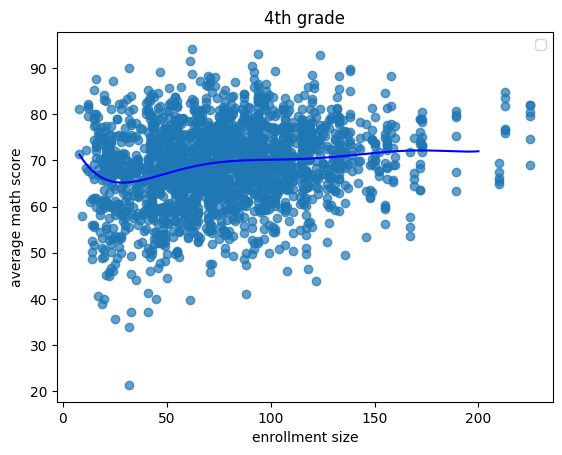

In [ ]:
poly=final4[['c_size','avgmath']].dropna()
X=poly['c_size'].values.reshape(-1, 1)
Y=poly['avgmath']

poly_features = PolynomialFeatures(degree=6).fit_transform(X)
y_pred=model.predict(poly_features)

plt.scatter(X, Y, cmap='viridis', alpha=0.7)
X_=np.linspace(8, 200, num=401)
plt.plot(X_, b+a1*X_**1+a2*X_**2+a3*X_**3+a4*X_**4+a5*X_**5+a6*X_**6, color='blue')


plt.title('4th grade')
plt.xlabel('enrollment size')
plt.ylabel('average math score')
plt.legend()

plt.show()

the best polynomial regression is 6th instead of 1st degree, which suggest that the relationship between enrollment size and test score is not entirely linear

### 4th grade

cross validation

In [ ]:
below=final4[(final4['c_size']>0) & (final4['c_size']<=40)]
poly4=below[['c_size','avgmath']].dropna()
X=poly4[['c_size']].values.reshape(-1, 1)
Y=poly4['avgmath']

degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
    hp_model = sklearn_sm(sm.OLS,)
    cv_results = cross_validate(hp_model, poly_features, Y, cv=X.shape[0], scoring='neg_mean_squared_error') #LOOCV
    cv_err = np.mean(-cv_results['test_score'])
    print("degree: " + str(degree) + ", error: " + str(cv_err))

degree: 1, error: 110.59113235951558
degree: 2, error: 110.19978549674384
degree: 3, error: 110.74994086122186
degree: 4, error: 111.53239569687518
degree: 5, error: 112.1467497691188
degree: 6, error: 112.68146026917236
degree: 7, error: 113.46160575660608


fitted values below cutoff

In [ ]:
below=final4[(final4['c_size']>0) & (final4['c_size']<=40)]
poly4=below[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']
poly_features = PolynomialFeatures(degree=2).fit_transform(X)
model1=sm.OLS(Y, poly_features).fit()


In [ ]:
target=pd.DataFrame()
target['c_size']=np.linspace(35, 40, num=6)
X=target[['c_size']].values.reshape(-1, 1)

poly_features = PolynomialFeatures(degree=2).fit_transform(X)
below_score=np.mean(model1.predict(poly_features))

cross validation

In [ ]:
above=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
poly4=above[['c_size','avgmath']].dropna()
X=poly4[['c_size']].values.reshape(-1, 1)
Y=poly4['avgmath']

degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
    hp_model = sklearn_sm(sm.OLS,)
    cv_results = cross_validate(hp_model, poly_features, Y, cv=X.shape[0], scoring='neg_mean_squared_error') #LOOCV
    cv_err = np.mean(-cv_results['test_score'])
    print("degree: " + str(degree) + ", error: " + str(cv_err))

degree: 1, error: 73.31122729974489
degree: 2, error: 73.4688324019867
degree: 3, error: 73.5943006706625
degree: 4, error: 73.78853882228526
degree: 5, error: 73.93536872458408
degree: 6, error: 73.92628727601908
degree: 7, error: 73.9241557897835


In [ ]:
above=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
poly4=above[['c_size','avgmath']].dropna()
X=poly4[['c_size']].values.reshape(-1, 1)
Y=poly4['avgmath']
poly_features = PolynomialFeatures(degree=3).fit_transform(X)
model2=sm.OLS(Y, poly_features).fit()

In [ ]:
target=pd.DataFrame()
target['c_size']=np.linspace(40, 45, num=6)
X=target[['c_size']].values.reshape(-1, 1)

poly_features = PolynomialFeatures(degree=3).fit_transform(X)
above_score=np.mean(model2.predict(poly_features))

In [ ]:
above_score-below_score

0.9757408243914085

Graphic illustration

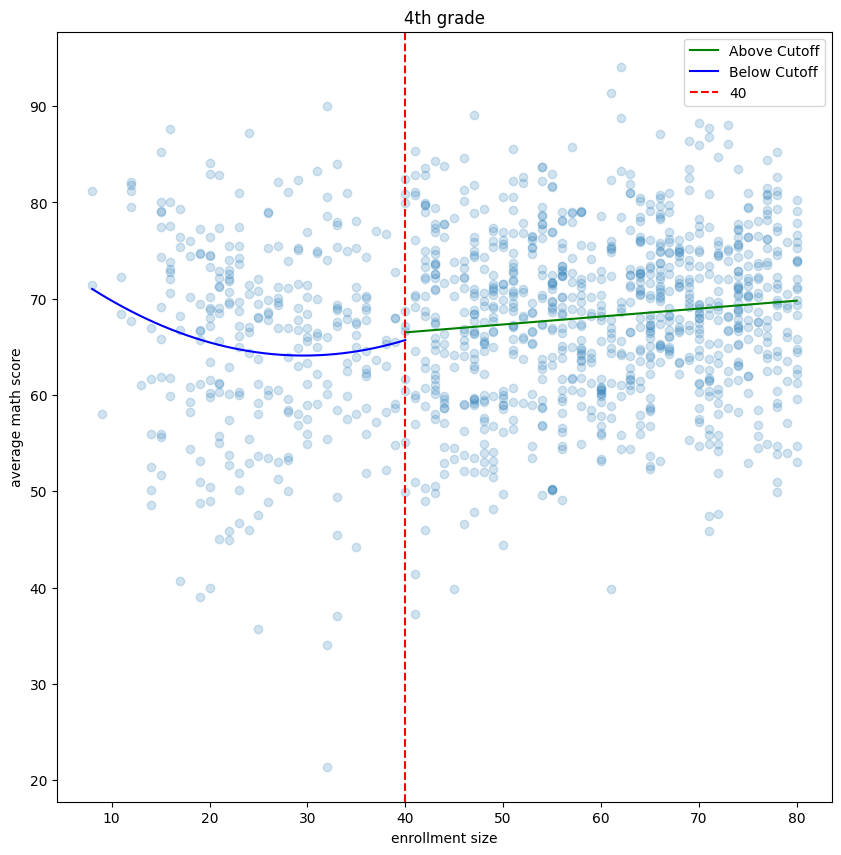

In [ ]:
plt.figure(figsize=(10, 10))
poly=final4[(final4['c_size']>0) & (final4['c_size']<=80)]
poly=poly[['c_size','avgmath']].dropna()
X=poly['c_size']
Y=poly['avgmath']
plt.scatter(X, Y, cmap='viridis', alpha=0.2)

# above
above=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
poly4=above[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']
poly_features = PolynomialFeatures(degree=1).fit_transform(X)
model2=sm.OLS(Y, poly_features).fit()
y_pred1=model2.predict(poly_features)
b1, a1 = model2.params
X_=np.linspace(40, 80, num=41)
plt.plot(X_, b1+a1*X_, label='Above Cutoff', color='green')

# below
below=final4[(final4['c_size']>0) & (final4['c_size']<40)]
poly4=below[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']
poly_features = PolynomialFeatures(degree=2).fit_transform(X)
model1=sm.OLS(Y, poly_features).fit()
y_pred2=model1.predict(poly_features)
b2, a2, a3 = model1.params
X_=np.linspace(8, 40, num=41)
plt.plot(X_, b2-0.5+X_*a2+a3*X_**2, label='Below Cutoff', color='blue')


plt.axvline(40, color='red', linestyle='--', label=f'{cutoff}')
plt.title('4th grade')
plt.xlabel('enrollment size')
plt.ylabel('average math score')
plt.legend()

plt.show()

Standard error by bootstrap

In [ ]:
n=1000
late = []
first_, second_ = 0, 0
for i in range(n):
    bootstrap_sample = final4[['c_size', 'avgmath']].sample(n=len(final4), replace=True)
    #below
    below=bootstrap_sample[(bootstrap_sample['c_size']>0) & (bootstrap_sample['c_size']<=40)]
    poly4=below[['c_size','avgmath']].dropna()
    X=poly4['c_size'].values.reshape(-1, 1)
    Y=poly4['avgmath']
    poly_features = PolynomialFeatures(degree=2).fit_transform(X)
    model1=sm.OLS(Y, poly_features).fit()
    target=pd.DataFrame()
    target['c_size']=np.linspace(35, 40, num=6)
    X=target[['c_size']].values.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=2).fit_transform(X)
    below_score=np.mean(model1.predict(poly_features))

    #above
    above=bootstrap_sample[(bootstrap_sample['c_size']>40) & (bootstrap_sample['c_size']<=80)]
    poly4=above[['c_size','avgmath']].dropna()
    X=poly4[['c_size']].values.reshape(-1, 1)
    Y=poly4['avgmath']
    poly_features = PolynomialFeatures(degree=3).fit_transform(X)
    model2=sm.OLS(Y, poly_features).fit()
    target=pd.DataFrame()
    target['c_size']=np.linspace(41, 46, num=6)
    X=target[['c_size']].values.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=3).fit_transform(X)
    above_score=np.mean(model2.predict(poly_features))
    LATE=above_score-below_score
    late.append(LATE)
    first_ += LATE
    second_ += LATE**2

print(-first_ / n)

print(np.sqrt(second_ / n - (first_ / n)**2))

print(np.std(late))


-1.006458627982116
1.524743084089197
1.5247430840891978


### 5th grade

In [ ]:
below=final5[(final5['c_size']>0) & (final5['c_size']<=40)]
poly4=below[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']

degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
    hp_model = sklearn_sm(sm.OLS,)
    cv_results = cross_validate(hp_model, poly_features, Y, cv=X.shape[0]) #LOOCV
    cv_err = np.mean(cv_results['test_score'])
    print("degree: " + str(degree) + ", error: " + str(cv_err))

degree: 1, error: 135.13974755420574
degree: 2, error: 135.30361543656483
degree: 3, error: 136.1989576181916
degree: 4, error: 138.74063744457055
degree: 5, error: 149.40843730566755
degree: 6, error: 136.10584688366976
degree: 7, error: 150.11451666142415


In [ ]:
above=final5[(final5['c_size']>40) & (final5['c_size']<=80)]
poly4=above[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']

degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
    hp_model = sklearn_sm(sm.OLS,)
    cv_results = cross_validate(hp_model, poly_features, Y, cv=X.shape[0]) #LOOCV
    cv_err = np.mean(cv_results['test_score'])
    print("degree: " + str(degree) + ", error: " + str(cv_err))

degree: 1, error: 91.2722071065386
degree: 2, error: 91.5043319346316
degree: 3, error: 91.47487743724064
degree: 4, error: 91.50662675151571
degree: 5, error: 91.30398430385718
degree: 6, error: 91.24026186221319
degree: 7, error: 91.23122996628788


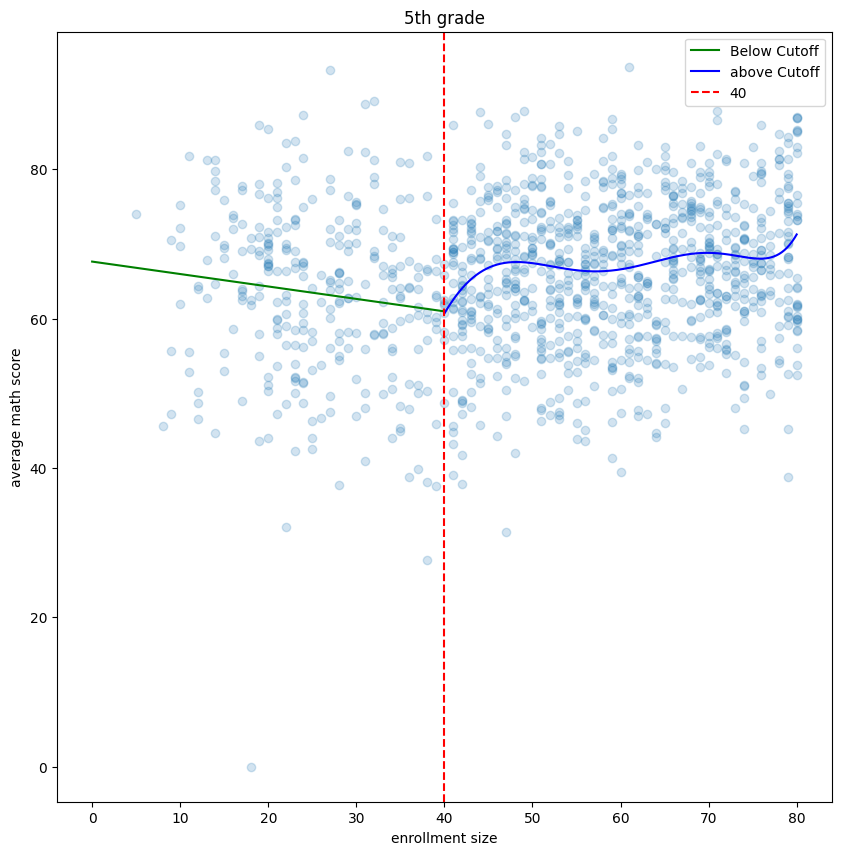

In [ ]:
plt.figure(figsize=(10, 10))
poly=final5[(final5['c_size']>0) & (final5['c_size']<=80)]
poly=poly[['c_size','avgmath']].dropna()
X=poly['c_size']
Y=poly['avgmath']
plt.scatter(X, Y, cmap='viridis', alpha=0.2)

# below
below=final5[(final5['c_size']>0) & (final5['c_size']<=40)]
poly5=below[['c_size','avgmath']].dropna()
X=poly5['c_size'].values.reshape(-1, 1)
Y=poly5['avgmath']
poly_features = PolynomialFeatures(degree=1).fit_transform(X)
model1=sm.OLS(Y, poly_features).fit()
y_pred1=model1.predict(poly_features)
b1, a1 = model1.params
X_=np.linspace(0, 40, num=401)
plt.plot(X_, b1+a1*X_, label='Below Cutoff', color='green')

# above
above=final5[(final5['c_size']>40) & (final5['c_size']<=80)]
poly5=above[['c_size','avgmath']].dropna()
X=poly5['c_size'].values.reshape(-1, 1)
Y=poly5['avgmath']
poly_features = PolynomialFeatures(degree=7).fit_transform(X)
model2=sm.OLS(Y, poly_features).fit()
y_pred2=model2.predict(poly_features)
b2, a2,a3,a4,a5,a6,a7,a8= model2.params
X_=np.linspace(40, 80, num=401)
plt.plot(X_, b2+1 + X_*a2 + X_**2*a3 + X_**3*a4 + X_**4*a5 + X_**5*a6 + X_**6*a7+ X_**7*a8, label='above Cutoff', color='blue')


plt.axvline(40, color='red', linestyle='--', label=f'{cutoff}')
plt.title('5th grade')
plt.xlabel('enrollment size')
plt.ylabel('average math score')
plt.legend()

plt.show()

Standard error by bootstrap

In [ ]:
n=1000
late = []
first_, second_ = 0, 0
for i in range(n):
    bootstrap_sample = final5[['c_size', 'avgmath']].sample(n=len(final5), replace=True)
    #below
    below=bootstrap_sample[(bootstrap_sample['c_size']>0) & (bootstrap_sample['c_size']<=40)]
    poly4=below[['c_size','avgmath']].dropna()
    X=poly4['c_size'].values.reshape(-1, 1)
    Y=poly4['avgmath']
    poly_features = PolynomialFeatures(degree=2).fit_transform(X)
    model1=sm.OLS(Y, poly_features).fit()
    target=pd.DataFrame()
    target['c_size']=np.linspace(35, 40, num=6)
    X=target[['c_size']].values.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=2).fit_transform(X)
    below_score=np.mean(model1.predict(poly_features))

    #above
    above=bootstrap_sample[(bootstrap_sample['c_size']>40) & (bootstrap_sample['c_size']<=80)]
    poly4=above[['c_size','avgmath']].dropna()
    X=poly4[['c_size']].values.reshape(-1, 1)
    Y=poly4['avgmath']
    poly_features = PolynomialFeatures(degree=3).fit_transform(X)
    model2=sm.OLS(Y, poly_features).fit()
    target=pd.DataFrame()
    target['c_size']=np.linspace(41, 46, num=6)
    X=target[['c_size']].values.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=3).fit_transform(X)
    above_score=np.mean(model2.predict(poly_features))
    LATE=above_score-below_score
    late.append(LATE)
    first_ += LATE
    second_ += LATE**2

print(-first_ / n)

print(np.sqrt(second_ / n - (first_ / n)**2))

print(np.std(late))


-3.7901535786845537
1.467800779525442
1.4678007795254326


## KNN regression

### full sample

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
test_size=int(round(final4.shape[0]*0.2))

data_train, data_valid = train_test_split(final4, test_size=test_size, random_state=0)
rmse_val = [] #to store rmse values for different k

poly4=data_train[['c_size','avgmath']].dropna()
x_train=poly4['c_size'].values.reshape(-1, 1)
y_train=poly4['avgmath']

poly4=data_valid[['c_size','avgmath']].dropna()
x_test=poly4['c_size'].values.reshape(-1, 1)
y_test=poly4['avgmath']

error=[]
k=[]
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    cv_results = cross_validate(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error') #LOOCV
    cv_err = np.mean(-cv_results['test_score'])
    error.append(cv_err)
    k.append(K)

In [ ]:
poly4=data_train[['c_size','avgmath']].dropna()
x_train=poly4['c_size'].values.reshape(-1, 1)
y_train=poly4['avgmath']

poly4=data_valid[['c_size','avgmath']].dropna()
x_test=poly4['c_size'].values.reshape(-1, 1)
y_test=poly4['avgmath']
model = neighbors.KNeighborsRegressor(n_neighbors = 95).fit(x_train, y_train)
y_pred = model.predict(x_test)
np.mean((y_test - y_pred)**2)

81.10141

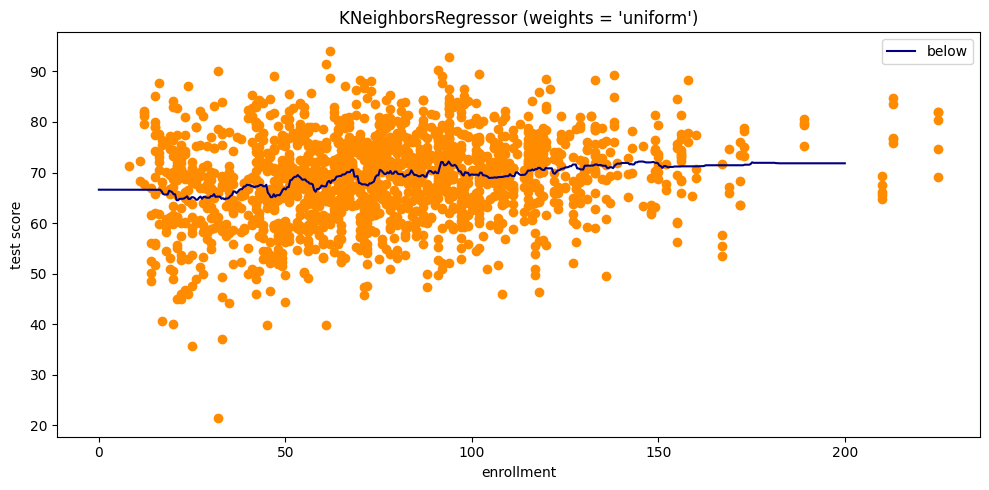

In [ ]:
from sklearn import neighbors

plt.figure(figsize=(10, 5))

model = neighbors.KNeighborsRegressor(n_neighbors = K)



knn = neighbors.KNeighborsRegressor(91, weights="uniform")
y_pred = knn.fit(x_train, y_train).predict(np.linspace(0, 200, 500)[:, np.newaxis])



plt.scatter(x_train, y_train, color="darkorange")

plt.plot(np.linspace(0, 200, 500)[:, np.newaxis], y_pred, color="navy", label="below")

plt.xlabel('enrollment')
plt.ylabel('test score')
plt.legend()
plt.title("KNeighborsRegressor (weights = '%s')" % ("uniform"))
plt.tight_layout()
plt.show()

In [ ]:
cv_knn=pd.DataFrame()
cv_knn['K']=k
cv_knn['error']=error
cv_knn[cv_knn['error']==np.min(cv_knn['error'])]

,K,error
90,91,72.151205


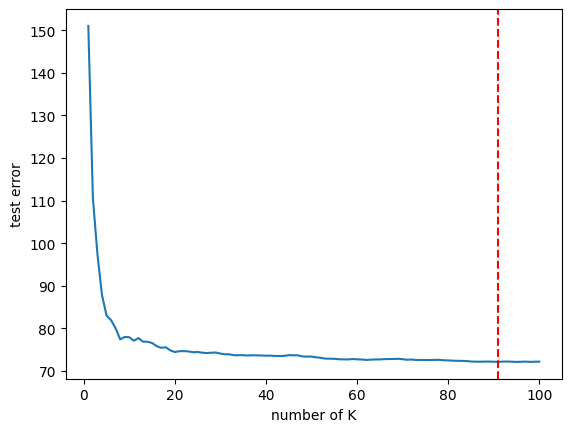

In [ ]:
plt.plot(cv_knn['K'],cv_knn['error'])
plt.xlabel('number of K')
plt.ylabel('test error')
plt.axvline(91, color='red', linestyle='--', label=91)
plt.show()

### 4th grade cross validation

In [ ]:
# select best k for below

poly4=final4[(final4['c_size']>0) & (final4['c_size']<=40)]
poly4=poly4[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']


error=[]
k=[]
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    cv_results = cross_validate(model, X, Y, cv=10, scoring='neg_mean_squared_error')
    cv_err = np.mean(-cv_results['test_score'])
    error.append(cv_err)
    k.append(K)

cv_knn=pd.DataFrame()
cv_knn['K']=k
cv_knn['error']=error
cv_knn[cv_knn['error']==np.min(cv_knn['error'])]

,K,error
93,94,110.271361


In [ ]:
# select best k for above


poly4=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
poly4=poly4[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']


error=[]
k=[]
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    cv_results = cross_validate(model, X, Y, cv=10,scoring='neg_mean_squared_error') #LOOCV
    cv_err = np.mean(-cv_results['test_score'])
    error.append(cv_err)
    k.append(K)

cv_knn=pd.DataFrame()
cv_knn['K']=k
cv_knn['error']=error
cv_knn[cv_knn['error']==np.min(cv_knn['error'])]

,K,error
97,98,74.713665


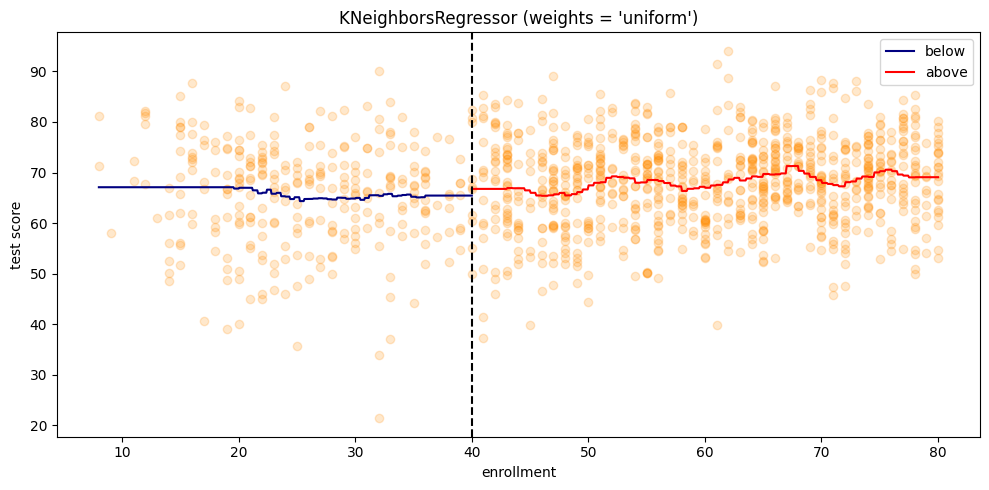

In [ ]:
from sklearn import neighbors

plt.figure(figsize=(10, 5))

n_neighbors_below = 90
n_neighbors_above = 98
below_knn4=final4[(final4['c_size']>0) & (final4['c_size']<=40)]
below_knn4=below_knn4[['c_size','avgmath']].dropna()

above_knn4=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
above_knn4=above_knn4[['c_size','avgmath']].dropna()



knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
y_below = knn.fit(below_knn4['c_size'].values.reshape(-1, 1), below_knn4['avgmath']).predict(np.linspace(0, 40, 500)[:, np.newaxis])
knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
y_above = knn.fit(above_knn4['c_size'].values.reshape(-1, 1), above_knn4['avgmath']).predict(np.linspace(40, 80, 500)[:, np.newaxis])


#plt.scatter(below_knn4['c_size'], below_knn4['avgmath'], color="darkorange")
plt.scatter(above_knn4['c_size'], above_knn4['avgmath'], color="darkorange", alpha=0.2)
plt.scatter(below_knn4['c_size'], below_knn4['avgmath'], color="darkorange", alpha=0.2)
plt.plot(np.linspace(8, 40, 500)[:, np.newaxis], y_below, color="navy", label="below")
plt.plot(np.linspace(40, 80, 500)[:, np.newaxis], y_above, color="red", label="above")
#plt.axis("tight")
plt.xlabel('enrollment')
plt.ylabel('test score')
plt.legend()
plt.title("KNeighborsRegressor (weights = '%s')" % ("uniform"))
plt.axvline(40, color='black', linestyle='--', label=40)
plt.tight_layout()
plt.show()

Compare MSE between KNN and polynomial regression, plot KNN graph (above and below cutoff)

In [ ]:
n_neighbors_below = 90
n_neighbors_above = 90
below_knn4=final4[(final4['c_size']>0) & (final4['c_size']<=40)]
below_knn4=below_knn4[['c_size','avgmath']].dropna()

above_knn4=final4[(final4['c_size']>40) & (final4['c_size']<=80)]
above_knn4=above_knn4[['c_size','avgmath']].dropna()

knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
y_below_pred = knn.fit(below_knn4['c_size'].values.reshape(-1, 1), below_knn4['avgmath']).predict(np.linspace(35, 40, 6)[:, np.newaxis])
knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
y_above_pred = knn.fit(above_knn4['c_size'].values.reshape(-1, 1), above_knn4['avgmath']).predict(np.linspace(40, 45, 6)[:, np.newaxis])
print(f'predicted average test score for schools with enrollment 35-40 is {np.mean(y_below_pred)}')
print(f'predicted average test score for schools with enrollment 40-45 is {np.mean(y_above_pred)}')
-(np.mean(y_above_pred)-np.mean(y_below_pred))

predicted average test score for schools with enrollment 35-40 is 65.40629577636719
predicted average test score for schools with enrollment 40-45 is 67.01831817626953


-1.6120224

In [ ]:
n=1000
late = []
first_, second_ = 0, 0
for i in range(n):
    bootstrap_sample = final4[['c_size', 'avgmath']].sample(n=len(final5), replace=True)
    n_neighbors_below = 60
    n_neighbors_above = 80
    below_knn5=bootstrap_sample[(bootstrap_sample['c_size']>0) & (bootstrap_sample['c_size']<=40)]
    below_knn5=below_knn5[['c_size','avgmath']].dropna()

    above_knn5=bootstrap_sample[(bootstrap_sample['c_size']>40) & (bootstrap_sample['c_size']<=80)]
    above_knn5=above_knn5[['c_size','avgmath']].dropna()



    knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
    y_below_pred = knn.fit(below_knn5['c_size'].values.reshape(-1, 1), below_knn5['avgmath']).predict(np.linspace(35, 40, 6)[:, np.newaxis])
    knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
    y_above_pred = knn.fit(above_knn5['c_size'].values.reshape(-1, 1), above_knn5['avgmath']).predict(np.linspace(40, 45, 6)[:, np.newaxis])
    LATE=np.mean(y_above_pred)-np.mean(y_below_pred)
    late.append(LATE)
    first_ += LATE
    second_ += LATE**2

print(-first_ / n)

print(np.sqrt(second_ / n - (first_ / n)**2))

print(np.std(late))


-1.6684561767578125
1.5123533251309826
1.5123533


### 5th grade cross validation

In [ ]:
# select best k for below

poly4=final5[(final5['c_size']>0) & (final5['c_size']<=40)]
poly4=poly4[['c_size','avgmath']].dropna()
X=poly4['c_size'].values.reshape(-1, 1)
Y=poly4['avgmath']


error=[]
k=[]
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    cv_results = cross_validate(model, X, Y, cv=10, scoring='neg_mean_squared_error')
    cv_err = np.mean(-cv_results['test_score'])
    error.append(cv_err)
    k.append(K)

cv_knn=pd.DataFrame()
cv_knn['K']=k
cv_knn['error']=error
cv_knn[cv_knn['error']==np.min(cv_knn['error'])]

,K,error
64,65,133.74589


In [ ]:
# select best k for above


poly5=final5[(final5['c_size']>40) & (final5['c_size']<=80)]
poly5=poly5[['c_size','avgmath']].dropna()
X=poly5['c_size'].values.reshape(-1, 1)
Y=poly5['avgmath']


error=[]
k=[]
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    cv_results = cross_validate(model, X, Y, cv=10,scoring='neg_mean_squared_error') #LOOCV
    cv_err = np.mean(-cv_results['test_score'])
    error.append(cv_err)
    k.append(K)

cv_knn=pd.DataFrame()
cv_knn['K']=k
cv_knn['error']=error
cv_knn[cv_knn['error']==np.min(cv_knn['error'])]

,K,error
79,80,93.054473


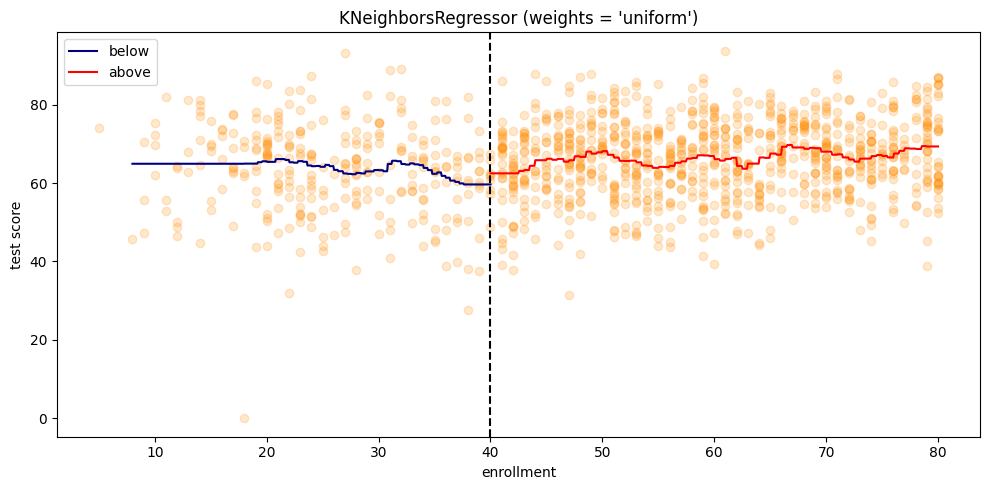

In [ ]:
from sklearn import neighbors

plt.figure(figsize=(10, 5))

n_neighbors_below = 65
n_neighbors_above = 80
below_knn5=final5[(final5['c_size']>0) & (final5['c_size']<=40)]
below_knn5=below_knn5[['c_size','avgmath']].dropna()

above_knn5=final5[(final5['c_size']>40) & (final5['c_size']<=80)]
above_knn5=above_knn5[['c_size','avgmath']].dropna()



knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
y_below = knn.fit(below_knn5['c_size'].values.reshape(-1, 1), below_knn5['avgmath']).predict(np.linspace(0, 40, 500)[:, np.newaxis])
knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
y_above = knn.fit(above_knn5['c_size'].values.reshape(-1, 1), above_knn5['avgmath']).predict(np.linspace(40, 80, 500)[:, np.newaxis])


plt.scatter(below_knn5['c_size'], below_knn5['avgmath'], color="darkorange", alpha=0.2)
plt.scatter(above_knn5['c_size'], above_knn5['avgmath'], color="darkorange", alpha=0.2)
plt.plot(np.linspace(8, 40, 500)[:, np.newaxis], y_below, color="navy", label="below")
plt.plot(np.linspace(40, 80, 500)[:, np.newaxis], y_above, color="red", label="above")
#plt.axis("tight")
plt.xlabel('enrollment')
plt.ylabel('test score')
plt.legend()
plt.title("KNeighborsRegressor (weights = '%s')" % ("uniform"))
plt.axvline(40, color='black', linestyle='--', label=40)
plt.tight_layout()
plt.show()

Compare MSE between KNN and polynomial regression, plot KNN graph (above and below cutoff)

In [ ]:
n_neighbors_below = 60
n_neighbors_above = 80
below_knn5=final5[(final5['c_size']>0) & (final5['c_size']<=40)]
below_knn5=below_knn5[['c_size','avgmath']].dropna()

above_knn5=final5[(final5['c_size']>40) & (final5['c_size']<=80)]
above_knn5=above_knn5[['c_size','avgmath']].dropna()



knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
y_below_pred = knn.fit(below_knn5['c_size'].values.reshape(-1, 1), below_knn5['avgmath']).predict(np.linspace(35, 40, 6)[:, np.newaxis])
knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
y_above_pred = knn.fit(above_knn5['c_size'].values.reshape(-1, 1), above_knn5['avgmath']).predict(np.linspace(40, 45, 6)[:, np.newaxis])
print(f'predicted average test score for schools with enrollment 35-40 is {np.mean(y_below_pred)}')
print(f'predicted average test score for schools with enrollment 40-45 is {np.mean(y_above_pred)}')
np.mean(y_above_pred)-np.mean(y_below_pred)

predicted average test score for schools with enrollment 35-40 is 60.163543701171875
predicted average test score for schools with enrollment 40-45 is 63.4456672668457


3.2821236

In [ ]:
n=1000
late = []
first_, second_ = 0, 0
for i in range(n):
    bootstrap_sample = final5[['c_size', 'avgmath']].sample(n=len(final5), replace=True)
    n_neighbors_below = 60
    n_neighbors_above = 80
    below_knn5=bootstrap_sample[(bootstrap_sample['c_size']>0) & (bootstrap_sample['c_size']<=40)]
    below_knn5=below_knn5[['c_size','avgmath']].dropna()

    above_knn5=bootstrap_sample[(bootstrap_sample['c_size']>40) & (bootstrap_sample['c_size']<=80)]
    above_knn5=above_knn5[['c_size','avgmath']].dropna()



    knn = neighbors.KNeighborsRegressor(n_neighbors_below, weights="uniform")
    y_below_pred = knn.fit(below_knn5['c_size'].values.reshape(-1, 1), below_knn5['avgmath']).predict(np.linspace(35, 40, 6)[:, np.newaxis])
    knn = neighbors.KNeighborsRegressor(n_neighbors_above, weights="uniform")
    y_above_pred = knn.fit(above_knn5['c_size'].values.reshape(-1, 1), above_knn5['avgmath']).predict(np.linspace(40, 45, 6)[:, np.newaxis])
    LATE=np.mean(y_above_pred)-np.mean(y_below_pred)
    late.append(LATE)
    first_ += LATE
    second_ += LATE**2

print(-first_ / n)

print(np.sqrt(second_ / n - (first_ / n)**2))

print(np.std(late))


-3.332151111602783
1.7463172873439856
1.7463173
